Constants

Gravitational Constant (G): 6.6743 * 10^-11 m^3/kg/s^2
Gravitational Acceleration (go): 9.81 m/s^2 (approximate)
Mass of the Earth (Me): 5.972 * 10^24 kg
Mass of the Moon (Mm): 7.35 * 10^22 kg
Radius of the Earth (Re): 6378.1 km
Radius of the MOon (Rm): 1738.1 km
Earth's Rotation Rate at the Equator: 7.272 * 10^-5 rad/s

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy

In [2]:
# Part 1.1

class FreeFallAnalytic:
    def __init__(self, shaft_depth, g=9.81):
        self.shaft_depth = shaft_depth
        self.g = g

    def calculate_time(self):
        return np.sqrt(2 * self.shaft_depth / self.g)

if __name__ == "__main__":
    shaft_depth = float(input("Enter the depth of the shaft in kilometers: ")) * 1000
    free_fall = FreeFallAnalytic(shaft_depth)
    time = free_fall.calculate_time()
    print(f"Analytic fall time: {time:.10f} s")

Enter the depth of the shaft in kilometers:  4


Analytic fall time: 28.5568624585 s


In [3]:
# Part 1.2: Reduction of the second-order equation

# The second-order diff. equation is: d^2y/dt^2 = -g - alpha*(dy/dt)^gamma
# introduce a new variable, v = dy/dt (velocity).
# the system of first-order equations is:
# dy/dt = v
# dv/dt = -g - alpha*v^gamma

figure 1


Enter the depth of the shaft in kilometers:  4


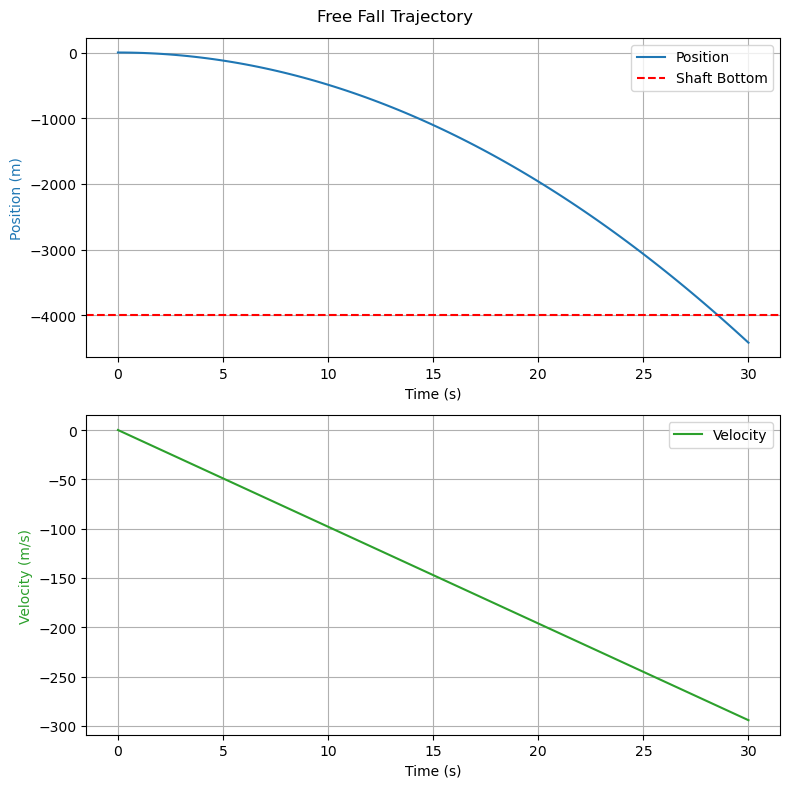

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
print("figure 1")
# Part 1.3

class FreeFallNumerical:
    def __init__(self, shaft_depth, g=9.81):
        self.shaft_depth = shaft_depth
        self.g = g

    def equations_of_motion(self, t, y):
        dy_dt = y[1]
        dv_dt = -self.g
        return [dy_dt, dv_dt]

    def solve(self):
        initial_conditions = [0, 0]
        t_span = (0, 30)  # estimated time span for 4km drop

        solution = solve_ivp(
            self.equations_of_motion,
            t_span,
            initial_conditions,
            dense_output=True
        )
        return solution

    def plot_trajectory(self, solution):
        t = np.linspace(solution.t[0], solution.t[-1], 100)  #solution time range
        y, v = solution.sol(t)

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

        # Position plot
        ax1.plot(t, y, label='Position', color='tab:blue')
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Position (m)', color='tab:blue')
        ax1.axhline(y=-self.shaft_depth, color='r', linestyle='--', label='Shaft Bottom')
        ax1.grid(True)
        ax1.legend()

        # Velocity plot
        ax2.plot(t, v, label='Velocity', color='tab:green')
        ax2.set_xlabel('Time (s)')
        ax2.set_ylabel('Velocity (m/s)', color='tab:green')
        ax2.grid(True)
        ax2.legend()

        fig.suptitle('Free Fall Trajectory')
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    shaft_depth = float(input("Enter the depth of the shaft in kilometers: ")) * 1000
    free_fall_numerical = FreeFallNumerical(shaft_depth)
    solution = free_fall_numerical.solve()
    free_fall_numerical.plot_trajectory(solution)

In [5]:
# Part 1.4
import numpy as np

class FreeFall:
 
    def __init__(self, g=9.81):
        self.g = g

    def calculate_fall_time(self, depth):
        if depth < 0:
            raise ValueError("Depth must be a non-negative value.")
        time = np.sqrt((2 * depth) / self.g)
        return time

if __name__ == "__main__":
    depth = float(input("Enter the depth of the mine shaft in meters: "))
    free_fall_calc = FreeFall()
    fall_time = free_fall_calc.calculate_fall_time(depth)
    print(f"The time for the test mass to reach the bottom is: {fall_time:.2f} seconds")

Enter the depth of the mine shaft in meters:  4000


The time for the test mass to reach the bottom is: 28.56 seconds


figure 2


Enter the depth of the shaft in kilometers:  4


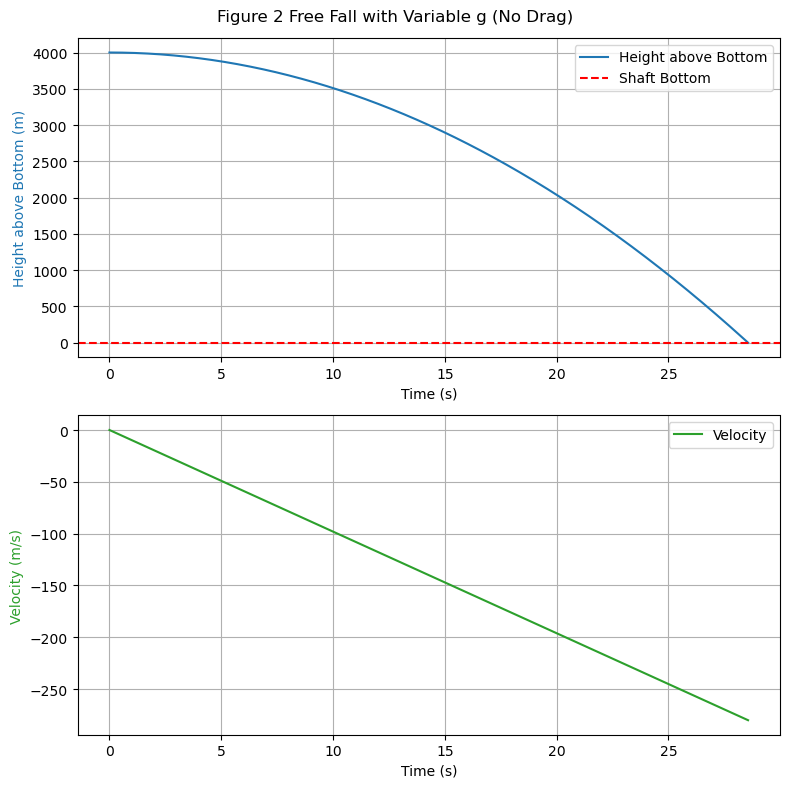

Time to reach the bottom: 28.5632425131 s
Time to reach bottom: 28.6 s


In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define Earth's radius
R_earth = 6378.1 * 1000  # Earth's radius in meters
from scipy.constants import g as g_earth  # Using scipy constants for Earth's gravity


# Part 2.1
print("figure 2")
class FreeFallVariableG:
    def __init__(self, shaft_depth, R=R_earth):
        self.shaft_depth = shaft_depth
        self.R = R  # Earth's radius

    def g(self, y):
        """Calculates g as a function of distance from Earth's center."""
        return g_earth * (y / self.R)

    def equations_of_motion(self, t, state):
        y, v = state
        dv_dt = -self.g(y)  # Only variable g
        dy_dt = v
        return [dy_dt, dv_dt]

    def solve(self):
        initial_conditions = [R_earth, 0]  # Initial position at Earth's radius
        t_span = (0, 1000)  # Increased time span

        def hit_bottom(t, state):
            return state[0] - (self.R - self.shaft_depth)
        hit_bottom.terminal = True

        solution = solve_ivp(
            self.equations_of_motion,
            t_span,
            initial_conditions,
            dense_output=True,
            events=hit_bottom
        )
        return solution

    def plot_trajectory(self, solution):
        t = np.linspace(solution.t[0], solution.t[-1], 500)
        y, v = solution.sol(t)

        # Height above the bottom of the shaft for plotting
        y_above_bottom = y - (self.R - self.shaft_depth)

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

        # Position plot
        ax1.plot(t, y_above_bottom, label='Height above Bottom', color='tab:blue')
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Height above Bottom (m)', color='tab:blue')
        ax1.axhline(y=0, color='r', linestyle='--', label='Shaft Bottom')
        ax1.grid(True)
        ax1.legend()

        # Velocity plot
        ax2.plot(t, v, label='Velocity', color='tab:green')
        ax2.set_xlabel('Time (s)')
        ax2.set_ylabel('Velocity (m/s)', color='tab:green')
        ax2.grid(True)
        ax2.legend()

        fig.suptitle('Figure 2 Free Fall with Variable g (No Drag)')
        plt.tight_layout()
        plt.show()
    
    def calculate_time_to_bottom(self, solution):

        time_to_bottom = solution.t_events[0][0]  # Time from the first event
        print(f"Time to reach the bottom: {time_to_bottom:.10f} s")
        return time_to_bottom

if __name__ == "__main__":
    shaft_depth_km = float(input("Enter the depth of the shaft in kilometers: "))
    shaft_depth = shaft_depth_km * 1000  # Convert to meters

    free_fall_variable_g = FreeFallVariableG(shaft_depth) # No alpha
    solution = free_fall_variable_g.solve()
    free_fall_variable_g.plot_trajectory(solution)
    time_to_bottom = free_fall_variable_g.calculate_time_to_bottom(solution)
    print(f"Time to reach bottom: {time_to_bottom:.1f} s")

In [7]:
# Part 2.2

#The effect of incorporating a height-dependent g is that the gravitational acceleration decreases as the object falls towards the center of the Earth.
#This results in a longer fall time compared to the constant g scenario.

figure 2


Enter the depth of the shaft in kilometers:  4


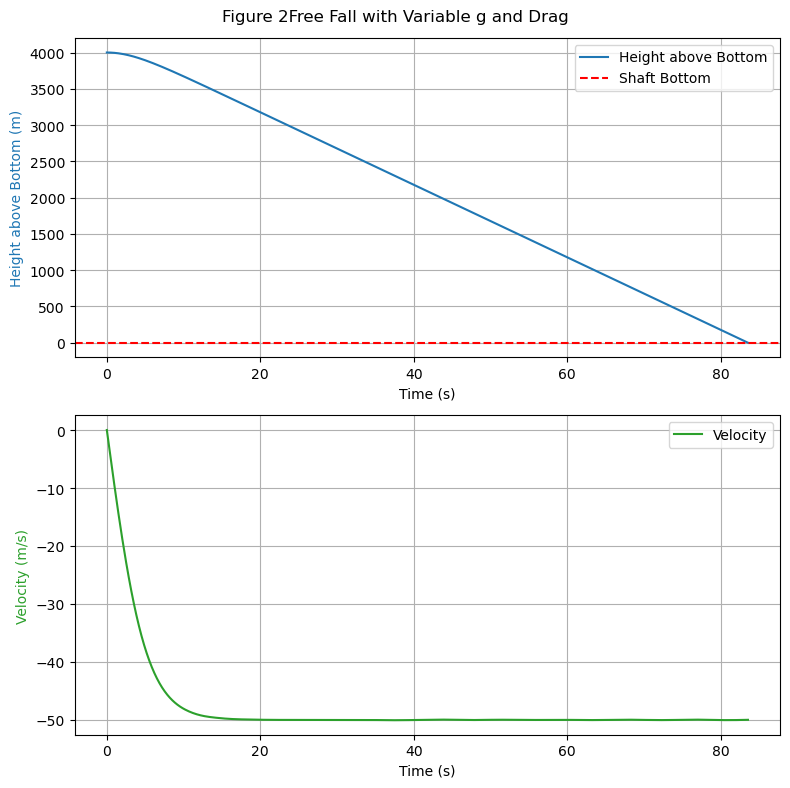

Time to reach the bottom: 83.5443328516 s
Time to reach bottom (with drag): 83.5 s


In [8]:
#part 2.3
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
print("figure 2")

R_earth = 6378.1 * 1000 
from scipy.constants import g as g_earth  

class FreeFallVariableGWithDrag: 
    def __init__(self, shaft_depth, alpha, gamma=2, R=R_earth):  # Added alpha and gamma
        self.shaft_depth = shaft_depth
        self.alpha = alpha
        self.gamma = gamma
        self.R = R  # Earth's radius

    def g(self, y):
        """Calculates g as a function of distance from Earth's center."""
        return g_earth * (y / self.R)

    def equations_of_motion(self, t, state):
        y, v = state
        dv_dt = -self.g(y) + self.alpha * np.abs(v)**self.gamma  # Variable g and drag
        if v > 0:
            dv_dt *= -1  # Drag opposes motion
        dy_dt = v
        return [dy_dt, dv_dt]

    def solve(self):
        initial_conditions = [R_earth, 0]  # Initial position at Earth's radius
        t_span = (0, 1000)  # Increased time span

        def hit_bottom(t, state):
            return state[0] - (self.R - self.shaft_depth)
        hit_bottom.terminal = True

        solution = solve_ivp(
            self.equations_of_motion,
            t_span,
            initial_conditions,
            dense_output=True,
            events=hit_bottom
        )
        return solution

    def plot_trajectory(self, solution):
        t = np.linspace(solution.t[0], solution.t[-1], 500)
        y, v = solution.sol(t)

        # Height above the bottom of the shaft for plotting
        y_above_bottom = y - (self.R - self.shaft_depth)

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

        # Position plot
        ax1.plot(t, y_above_bottom, label='Height above Bottom', color='tab:blue')
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Height above Bottom (m)', color='tab:blue')
        ax1.axhline(y=0, color='r', linestyle='--', label='Shaft Bottom')
        ax1.grid(True)
        ax1.legend()

        # Velocity plot
        ax2.plot(t, v, label='Velocity', color='tab:green')
        ax2.set_xlabel('Time (s)')
        ax2.set_ylabel('Velocity (m/s)', color='tab:green')
        ax2.grid(True)
        ax2.legend()

        fig.suptitle('Figure 2Free Fall with Variable g and Drag')  # Updated title
        plt.tight_layout()
        plt.show()

    def calculate_time_to_bottom(self, solution):
        time_to_bottom = solution.t_events[0][0]  # Time from the first event
        print(f"Time to reach the bottom: {time_to_bottom:.10f} s")
        return time_to_bottom


if __name__ == "__main__":
    shaft_depth_km = float(input("Enter the depth of the shaft in kilometers: "))
    shaft_depth = shaft_depth_km * 1000  # Convert to meters

    # Estimating alpha from terminal velocity (50 m/s)
    terminal_velocity = 50  # m/s
    alpha_estimated = g_earth / terminal_velocity**2  # g = alpha * v^2 => alpha = g / v^2

    free_fall_variable_g_drag = FreeFallVariableGWithDrag(shaft_depth, alpha_estimated)  # Instantiating the drag class
    solution_with_drag = free_fall_variable_g_drag.solve()
    free_fall_variable_g_drag.plot_trajectory(solution_with_drag)
    time_to_bottom_with_drag = free_fall_variable_g_drag.calculate_time_to_bottom(solution_with_drag)
    print(f"Time to reach bottom (with drag): {time_to_bottom_with_drag:.1f} s")

In [9]:
# 3.1

# Coriolis force: F_c = -2m(Ω x v)

# For equator:
# F_cx = +2mΩv_y
# F_cy = -2mΩv_x

# F = ma, so accelerations are:
# a_x = d^2x/dt^2 = 2Ωv_y
# a_y = d^2y/dt^2 = -g(y) - 2Ωv_x + α|dy/dt|^γ
# (g(y) is variable gravity, α is drag coefficient, γ is drag exponent)

# First-order system (with v_x = dx/dt, v_y = dy/dt):
# dx/dt = v_x
# dy/dt = v_y
# dv_x/dt = 2Ωv_y
# dv_y/dt = -g(y) - 2Ωv_x + α|v_y|^γ

In [10]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # For setting specific ticks

# Define constants
g_earth = 9.81  # m/s^2
R_earth = 6378.1 * 1000  # Earth's radius in meters
omega_earth = 7.272e-5  # Earth's rotation rate at the Equator

# Part 3

class FreeFallCoriolis:
    def __init__(self, shaft_depth, alpha=0, gamma=2):
        self.shaft_depth = shaft_depth
        self.alpha = alpha
        self.gamma = gamma
        self.R = R_earth
        self.omega = omega_earth
        self.solution = None

    def g(self, y):
        
        return g_earth * (y / self.R)

    def equations_of_motion(self, t, state):
        x, y, vx, vy = state

        ay = -self.g(y) - 2 * self.omega * vx
        ax = 2 * self.omega * vy

        if self.alpha != 0:
            ay += self.alpha * np.abs(vy) ** self.gamma
            if vy > 0:
                ay -= 2 * self.alpha * np.abs(vy) ** self.gamma

        dx_dt = vx
        dy_dt = vy
        dvx_dt = ax
        dvy_dt = ay
        return [dx_dt, dy_dt, dvx_dt, dvy_dt]

    def solve(self):
        initial_conditions = [0, self.R, 0, 0]
        t_span = (0, 1000)

        def hit_bottom(t, state):
            return state[1] - (self.R - self.shaft_depth)

        hit_bottom.terminal = True

        self.solution = scipy.integrate.solve_ivp(
            self.equations_of_motion,
            t_span,
            initial_conditions,
            dense_output=True,
            events=hit_bottom,
        )
        return self.solution

    def plot_trajectory(self, ax):
        "Plots the trajectory using the provided axes object with fixed x-axis and ticks."

        if self.solution is None:
            raise ValueError("Solve the equations first.")

        t = np.linspace(self.solution.t[0], self.solution.t[-1], 500)
        x, y, _, _ = self.solution.sol(t)
        y_above_bottom = y - (self.R - self.shaft_depth)

        ax.plot(x, y_above_bottom, marker='.', linestyle='-', markersize=4)
        ax.set_xlabel('Transverse Position (m)')
        ax.set_ylabel('Height above Bottom (m)')
        ax.set_title('Trajectory with Coriolis Force')
        ax.grid(True)

        # Set fixed x-axis limits
        ax.set_xlim(-10, 10)

        # Set specific x-axis ticks
        ax.xaxis.set_major_locator(ticker.FixedLocator([-10, -5, 0, 5, 10]))

        # Ensure equal aspect ratio
        ax.set_box_aspect(1)

    def get_time_to_bottom(self):
        "Returns the time to reach the bottom."
        if self.solution is None:
            raise ValueError("Solve the equations first.")
        return self.solution.t_events[0][0]

    def get_final_transverse_position(self):
        "Returns the final transverse position."
        if self.solution is None:
            raise ValueError("Solve the equations first.")
        return self.solution.y[0, -1]

figure 3


Enter the depth of the shaft in kilometers:  4


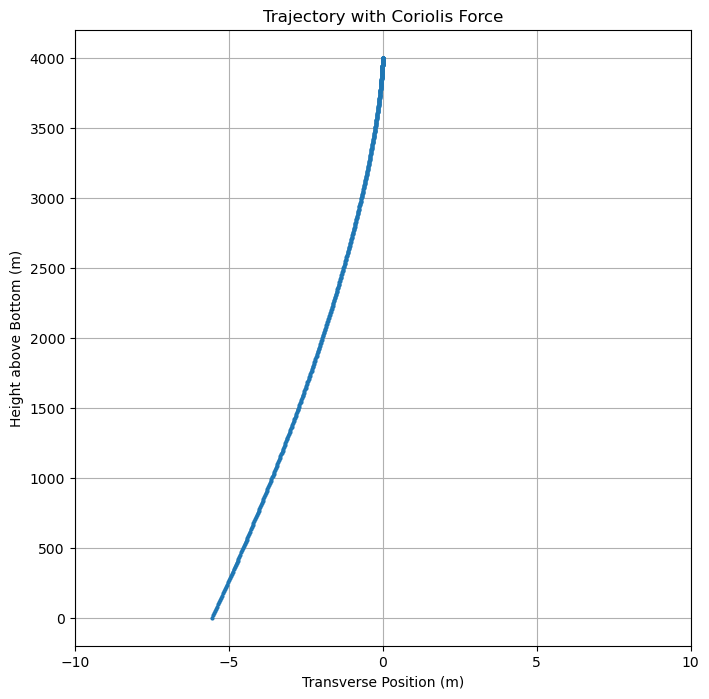

Time to reach bottom: 28.6 s


In [11]:
# Part 3.2

import numpy as np
import matplotlib.pyplot as plt
print("figure 3")

g_earth = 9.81  # m/s^2
R_earth = 6378.1 * 1000  # Earth's radius in meters
omega_earth = 7.272e-5  # Earth's rotation rate at the Equator

if __name__ == "__main__":
    shaft_depth_km = float(input("Enter the depth of the shaft in kilometers: "))
    shaft_depth = shaft_depth_km * 1000

    # Create figure and axes
    fig, ax = plt.subplots(figsize=(8, 8))

    # Solve and plot
    free_fall = FreeFallCoriolis(shaft_depth)
    free_fall.solve()
    free_fall.plot_trajectory(ax)

    plt.show()

    # Print time to bottom
    time_to_bottom = free_fall.get_time_to_bottom()
    print(f"Time to reach bottom: {time_to_bottom:.1f} s")

In [12]:
# Part 3.3/4

if __name__ == "__main__":
    shaft_depth_km = float(input("Enter the depth of the shaft in kilometers: "))
    shaft_depth = shaft_depth_km * 1000
    shaft_width = 5

    # Estimate alpha
    terminal_velocity = 50
    alpha_estimated = g_earth / terminal_velocity**2

    free_fall_no_drag = FreeFallCoriolis(shaft_depth)
    free_fall_with_drag = FreeFallCoriolis(shaft_depth, alpha=alpha_estimated)

    free_fall_no_drag.solve()
    free_fall_with_drag.solve()

    final_x_no_drag = free_fall_no_drag.get_final_transverse_position()
    final_x_with_drag = free_fall_with_drag.get_final_transverse_position()

    time_to_bottom_no_drag = free_fall_no_drag.get_time_to_bottom()
    time_to_bottom_with_drag = free_fall_with_drag.get_time_to_bottom()

    print("Without Drag:")
    print(f"Final x: {final_x_no_drag:.2f} m, Time: {time_to_bottom_no_drag:.1f} s")

    print("\nWith Drag:")
    print(f"Final x: {final_x_with_drag:.2f} m, Time: {time_to_bottom_with_drag:.1f} s")

    # Conclusions
    print("\nConclusions for Part 3.4")
    if abs(final_x_no_drag) > shaft_width / 2:
        print("Without drag, the mass hits the wall.")
    else:
        print("Without drag, the mass does not hit the wall.")

    if abs(final_x_with_drag) > shaft_width / 2:
        print("With drag, the mass hits the wall.")
    else:
        print("With drag, the mass does not hit the wall.")

    print("Drag reduces the deflection caused by the Coriolis force and increases the fall time.")

Enter the depth of the shaft in kilometers:  4


Without Drag:
Final x: -5.54 m, Time: 28.6 s

With Drag:
Final x: -23.31 m, Time: 83.5 s

Conclusions for Part 3.4
Without drag, the mass hits the wall.
With drag, the mass hits the wall.
Drag reduces the deflection caused by the Coriolis force and increases the fall time.


In [13]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt


g_earth = 9.81  # m/s^2
R_earth = 6378.1 * 1000  # Earth's radius in meters
M_earth = 5.972e24  # kg
G = 6.6743e-11  # m^3 kg^-1 s^-2

# Part 4

class InfiniteMine:
    def __init__(self):
        self.R = R_earth
        self.G = G
        self.M = M_earth
        self.solution = None

    def g(self, y):
        """Calculates g as a function of distance from Earth's center."""
        return (self.G * self.M * y) / self.R**3

    def equations_of_motion(self, t, state):
        y, vy = state
        ay = -self.g(y)
        dy_dt = vy
        dvy_dt = ay
        return [dy_dt, dvy_dt]

    def solve(self):
        initial_conditions = [self.R, 0]  # Start at Earth's surface
        t_span = (0, 6000)  # Extend time to see full oscillation

        self.solution = scipy.integrate.solve_ivp(
            self.equations_of_motion,
            t_span,
            initial_conditions,
            dense_output=True,
        )
        return self.solution

    def plot_trajectory(self, ax):
        """Plots depth and velocity as a function of time."""

        if self.solution is None:
            raise ValueError("Solve the equations first.")

        t = np.linspace(self.solution.t[0], self.solution.t[-1], 500)
        y, vy = self.solution.sol(t)

        ax.plot(t, y, label='Depth (m)')
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Depth (m)', color='tab:blue')
        ax.tick_params(axis='y', labelcolor='tab:blue')
        ax2 = ax.twinx()  # Create a second y-axis
        ax2.plot(t, vy, label='Velocity (m/s)', color='tab:orange')
        ax2.set_ylabel('Velocity (m/s)', color='tab:orange')
        ax2.tick_params(axis='y', labelcolor='tab:orange')
        ax.set_title('Motion in an Infinitely Deep Mine')
        ax.legend(loc='upper left')
        ax2.legend(loc='upper right')

    def get_crossing_time(self):
        """Calculates the time to reach the other side of the Earth."""

        if self.solution is None:
            raise ValueError("Solve the equations first.")

        # The other side is at y = -R_earth.  Find the first time this occurs after t=0.
        crossing_time = None
        t = self.solution.t
        y = self.solution.y[0]

        for i in range(1, len(t)):
            if y[i-1] > -self.R and y[i] <= -self.R:
                crossing_time = t[i]
                break
        return crossing_time

    def get_center_time_and_speed(self):
        """Calculates the time to reach the center and the speed there."""

        if self.solution is None:
            raise ValueError("Solve the equations first.")

        # The center is at y = 0. Find the first time this occurs after t=0.
        center_time = None
        center_speed = None
        t = self.solution.t
        y = self.solution.y[0]
        vy = self.solution.y[1]

        for i in range(1, len(t)):
            if y[i-1] > 0 and y[i] <= 0:
                center_time = t[i]
                center_speed = vy[i]
                break

        return center_time, center_speed

    def get_orbital_period(self):
        """Calculates the orbital period."""
        return 2 * np.pi * np.sqrt(self.R**3 / (self.G * self.M))

figure 4


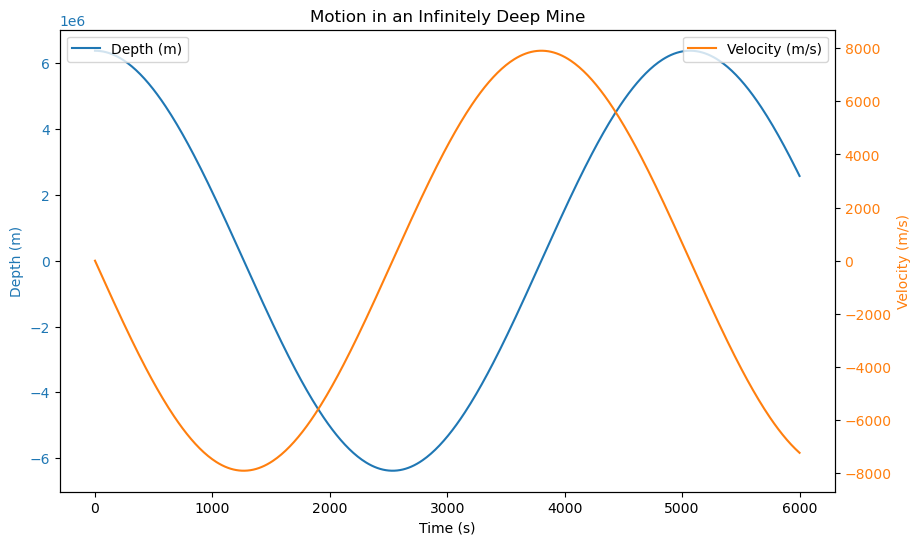

In [14]:
# Part 4.1:
print("figure 4")
if __name__ == "__main__":
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Solve and plot
    infinite_mine = InfiniteMine()
    infinite_mine.solve()
    infinite_mine.plot_trajectory(ax)

    plt.show()

    #The graph shows sinusoidal motion, indicating oscillation.
    #The velocity is 90 degrees out of phase with the position, as expected in harmonic motion.
    #The object reaches a maximum velocity at the center of the Earth (y=0) and zero velocity at the surface and opposite surface.

In [15]:
# Part 4.2

# Constants (for calculation purposes)
# g earth = 9.81
# R earth = 6378.1e3  # m
# M earth = 5.972e24  # kg
# G = 6.6743e-11

# Orbital period (T) calculation
# T = 2*pi * sqrt(R earth**3 / (G * M earth))
#T = 5066  seconds (calculated)

# Time to reach other side: T / 2
#crossing time = 2533  seconds

# Time to reach center: T / 4
#center time = 1266.5   seconds

# Speed at center: omega * R earth, where omega = 2*pi / T
#omega = 0.001239 rad/s
#speed at center = 7899   m/s

In [16]:
# Part 4.3

#The "crossing-time" (time to reach the other side) is one-half (1/2) of the orbital period at the Earth's surface.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, quad


G = 6.6743e-11  # m^3 kg^-1 s^-2
R_earth_km = 6378.1  # km
R_earth = R_earth_km * 1000  # m
M_earth = 5.972e24  # kg

class NonUniformEarth:
    def __init__(self):
        self.G = G
        self.R_earth = R_earth
        self.M_earth = M_earth

    def density_profile(self, r, n, rho_n):
        """Calculates the density at a given radius r."""
        return rho_n * (1 - (r/self.R_earth)**n)

    def mass_enclosed(self, r_prime, n, rho_n):
        """Calculates the mass enclosed within radius r_prime."""
        integrand = lambda r: 4 * np.pi * r**2 * self.density_profile(r, n, rho_n)
        mass, _ = quad(integrand, 0, r_prime)
        return mass

    def force_profile(self, r, n, rho_n):
        """Calculates the gravitational force at a given radius r."""
        r = np.asarray(r)
        force = np.zeros_like(r)
        for i, ri in enumerate(r):
            if ri != 0:
                force[i] = self.G * self.mass_enclosed(ri, n, rho_n) / ri**2
            else:
                force[i] = 0  # Avoid division by zero
        return force


    def acceleration(self, y, n, rho_n):
        """Calculates the acceleration at a given distance y from the center."""
        r = np.abs(y)
        if np.isscalar(r) and r == 0: # Handle scalar zero
            return 0
        elif (r == 0).any(): # Handle array with zero
            acc = np.zeros_like(r)
            acc[r != 0] = -np.sign(y[r != 0]) * (self.G * self.mass_enclosed(r[r != 0], n, rho_n)) / r[r != 0]**2
            return acc
        else:
            return -np.sign(y) * (self.G * self.mass_enclosed(r, n, rho_n)) / r**2

    def equations_of_motion(self, t, state, n, rho_n):
        y, v = state
        dv_dt = self.acceleration(y, n, rho_n)
        dy_dt = v
        return [dy_dt, dv_dt]

    def find_rho_n(self, n):
        if n == 0:
            return self.M_earth / (4/3 * np.pi * self.R_earth**3)
        elif n > 0:
            integrand = lambda r: 4 * np.pi * r**2 * (1 - (r/self.R_earth)**n)
            integral, _ = quad(integrand, 0, self.R_earth)
            return self.M_earth / integral
        return None

    def solve_motion(self, n, t_span, initial_conditions):
        rho_n = self.find_rho_n(n)
        if rho_n is not None:
            solution = solve_ivp(self.equations_of_motion, t_span, initial_conditions,
                                 dense_output=True, args=(n, rho_n))
            return solution
        return None

    def solve_motion_with_event(self, n, t_span, initial_conditions, event):
        rho_n = self.find_rho_n(n)
        if rho_n is not None:
            solution = solve_ivp(self.equations_of_motion, t_span, initial_conditions,
                                 events=event, dense_output=True, args=(n, rho_n))
            return solution
        return None

Figure 5


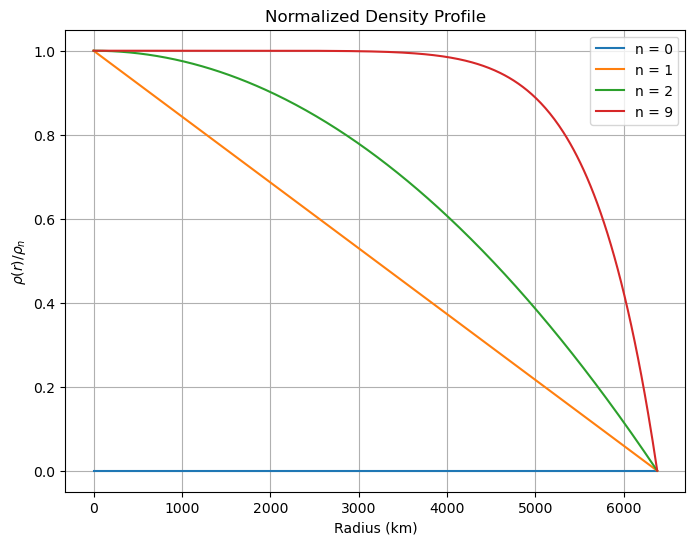

In [18]:
# 5.1
print("Figure 5")
if __name__ == "__main__":
    non_uniform_earth = NonUniformEarth()
    n_values = [0, 1, 2, 9]
    r = np.linspace(0, non_uniform_earth.R_earth, 500)
    rho_n = 1  # Define rho_n here

    fig, ax = plt.subplots(figsize=(8, 6))

    for n in n_values:
        rho = non_uniform_earth.density_profile(r, n, rho_n)  # Pass rho_n
        ax.plot(r / 1000, rho, label=f'n = {n}')

    ax.set_xlabel('Radius (km)')
    ax.set_ylabel(r'$\rho(r) / \rho_n$')
    ax.set_title('Normalized Density Profile')
    ax.legend()
    ax.grid(True)

    plt.show()
    

Figure 6


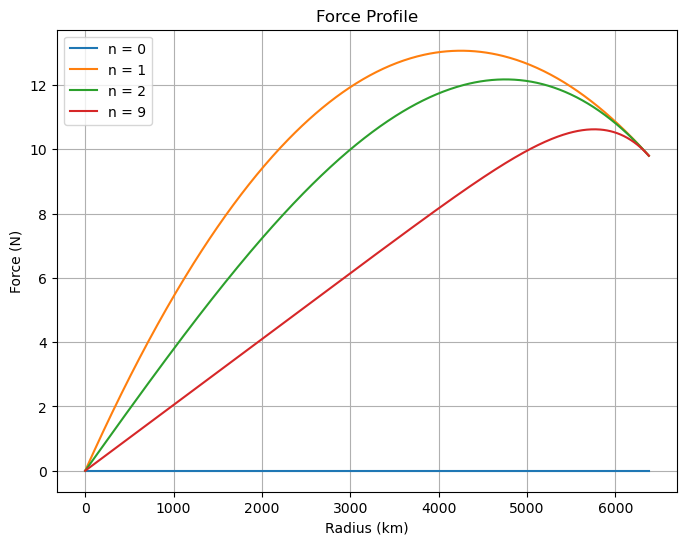

In [19]:
# 5.2
print("Figure 6")
if __name__ == "__main__":
    non_uniform_earth = NonUniformEarth()
    n_values = [0, 1, 2, 9]
    r = np.linspace(1, non_uniform_earth.R_earth, 500)  # Avoid division by zero

    fig, ax = plt.subplots(figsize=(8, 6))

    for n in n_values:
        rho_n = non_uniform_earth.find_rho_n(n)
        if rho_n is not None:
            f = non_uniform_earth.force_profile(r, n, rho_n)
            ax.plot(r / 1000, f, label=f'n = {n}')  # Convert r to km

    ax.set_xlabel('Radius (km)')
    ax.set_ylabel('Force (N)')
    ax.set_title('Force Profile')
    ax.legend()
    ax.grid(True)

    plt.show()
    


Figure 7


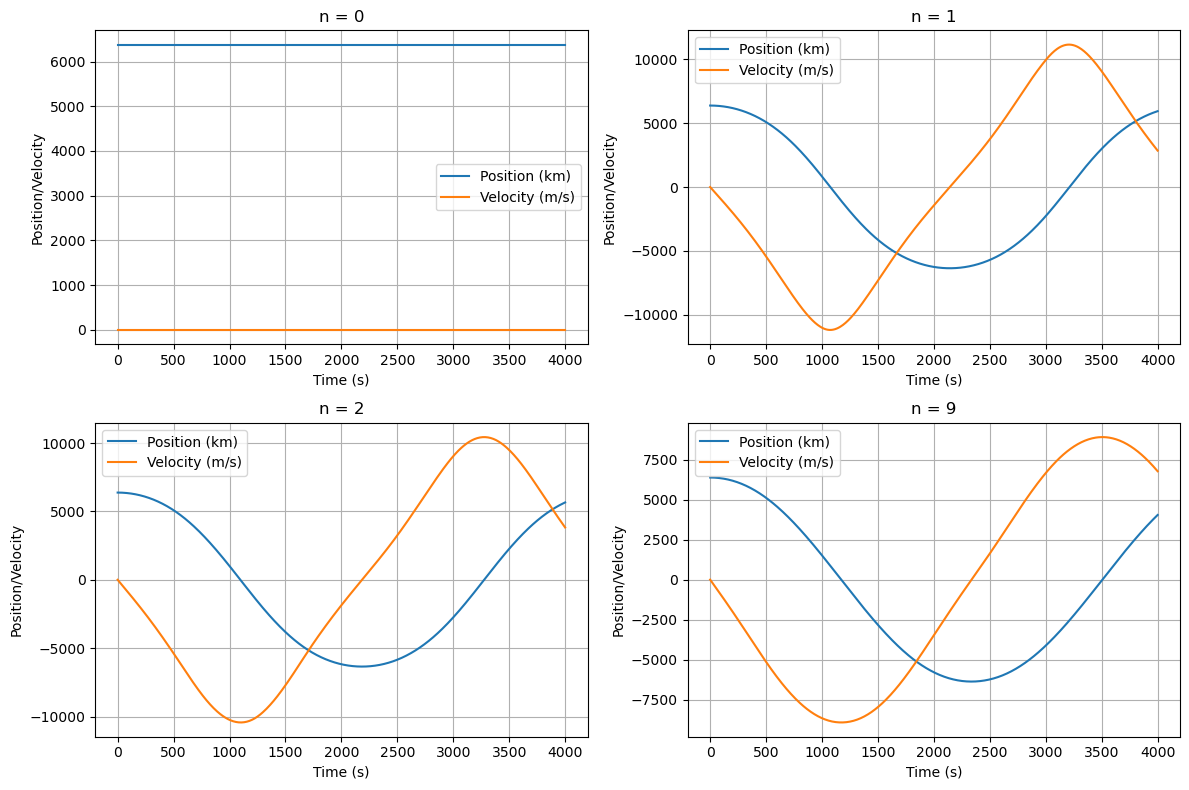

In [20]:
# 5.3
print("Figure 7")
if __name__ == "__main__":
    non_uniform_earth = NonUniformEarth()
    n_values = [0, 1, 2, 9]
    t_span = (0, 4000)
    initial_conditions = [non_uniform_earth.R_earth, 0]

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()  # Flatten the 2x2 array of axes

    for i, n in enumerate(n_values):
        solution = non_uniform_earth.solve_motion(n, t_span, initial_conditions)
        if solution:
            t = np.linspace(solution.t[0], solution.t[-1], 500)
            y, v = solution.sol(t)
            axes[i].plot(t, y / 1000, label='Position (km)')
            axes[i].plot(t, v, label='Velocity (m/s)')
            axes[i].set_xlabel('Time (s)')
            axes[i].set_ylabel('Position/Velocity')
            axes[i].set_title(f'n = {n}')
            axes[i].grid(True)
            axes[i].legend()

    plt.tight_layout()
    plt.show()
    

In [21]:
# 5.4
if __name__ == "__main__":
    non_uniform_earth = NonUniformEarth()
    n_values = [0, 1, 2, 9]
    initial_conditions = [non_uniform_earth.R_earth, 0]

    print("# Part 5.4: Time to reach the center and speed there")
    for n in n_values:
        def hit_center(t, state, n, rho_n):  # Accept extra args
            return state[0]  # Stop when position is zero
        hit_center.terminal = True
        hit_center.direction = -1

        solution = non_uniform_earth.solve_motion_with_event(n, (0, 4000), initial_conditions, hit_center)

        print(f"# For n = {n}:")
        if solution and solution.t_events[0].size > 0:
            time_to_center = solution.t_events[0][0]
            speed_at_center = solution.sol(time_to_center)[1]
            print(f"#   Time to reach center: {time_to_center:.1f} s")
            print(f"#   Speed at center: {abs(speed_at_center):.1f} m/s")
        else:
            print("#   Object did not reach the center within the simulated time.")


# Part 5.4: Time to reach the center and speed there
# For n = 0:
#   Object did not reach the center within the simulated time.
# For n = 1:
#   Time to reach center: 1074.2 s
#   Speed at center: 11185.8 m/s
# For n = 2:
#   Time to reach center: 1096.9 s
#   Speed at center: 10435.2 m/s
# For n = 9:
#   Time to reach center: 1171.3 s
#   Speed at center: 8919.3 m/s


In [22]:
# Part 6

# 1. Compute the travel time to the center of the moon...

#   -   Motion is SHM.
#   -   a_moon(y) = -(G * M_moon / R_moon^3) * y
#   -   omega_moon = sqrt(G * M_moon / R_moon^3)
#   -   T_moon = 2 * pi / omega_moon
#   -   time_to_center_moon = T_moon / 4

# 2. What is the density of the moon compared to that of Earth?

#   -   rho = M / V
#   -   rho_earth ~ M_earth / R_earth^3
#   -   rho_moon ~ M_moon / R_moon^3
#   -   rho_moon / rho_earth = (M_moon / M_earth) * (R_earth / R_moon)^3

# 3.  How does fall/orbit time depend on density?

#   -   T ~ sqrt(R^3 / (G * M))
#   -   M ~ rho * R^3
#   -   T ~ sqrt(R^3 / (G * rho * R^3))
#   -   T ~ 1 / sqrt(rho)  (Inverse square root relationship)